In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
data = wb.DataReader("ICBP.JK", "yahoo", start = "20140101")["Adj Close"]
data = pd.DataFrame(data)
data.head(10)

,Adj Close
Date,
2014-01-02,4267.802734
2014-01-03,4165.701660
2014-01-06,4135.071777
2014-01-07,4124.861328
2014-01-08,4114.651855
2014-01-09,4073.812256
2014-01-10,4084.022217
2014-01-13,4145.281738
2014-01-15,4390.323242


In [3]:
data.tail(10)

,Adj Close
Date,
2020-07-27,9000.0
2020-07-28,9050.0
2020-07-29,9125.0
2020-07-30,9200.0
2020-08-03,9300.0
2020-08-04,10025.0
2020-08-05,10550.0
2020-08-06,10325.0
2020-08-07,10175.0


### Task 2 : Calculate Daily Return

In [4]:
return_daily = data.pct_change().dropna()
return_daily.head(10)

,Adj Close
Date,
2014-01-03,-0.023924
2014-01-06,-0.007353
2014-01-07,-0.002469
2014-01-08,-0.002475
2014-01-09,-0.009925
2014-01-10,0.002506
2014-01-13,0.015000
2014-01-15,0.059113
2014-01-16,0.009302


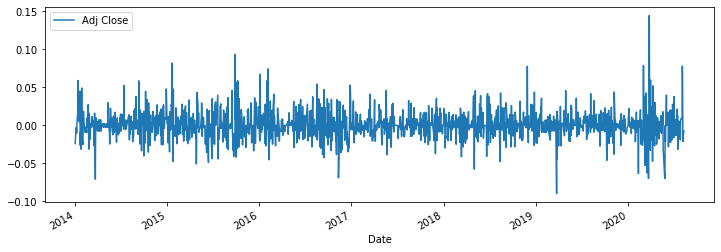

In [5]:
return_daily.plot(figsize = (12,4))
plt.show()

### Task 3 : Calculate Drift

mean

In [6]:
u = return_daily.mean()
u

Adj Close    0.000676
dtype: float64

variance

In [7]:
var = return_daily.var()
var

Adj Close    0.000314
dtype: float64

drift

$$ drift = u - \frac{1}{2}\sigma^2$$

In [8]:
drift = u - (0.5 * var)
drift

Adj Close    0.000519
dtype: float64

standar deviation

In [9]:
stdev = return_daily.std()
stdev

Adj Close    0.017718
dtype: float64

### Task 4 : Calculate Return Daily $e^r$

$r = (u - \frac{1}{2}\sigma^2) + \sigma  Z(Rand(0;1))$

$r = drift + stdev . z$


In [10]:
t_interval = 1095
iteration = 10

In [11]:
return_daily_e = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_interval,iteration)))
return_daily_e

array([[0.99951543, 1.00240638, 0.99475034, ..., 1.00251329, 1.02689863,
        1.00431875],
       [0.98432345, 0.96718674, 0.98272603, ..., 0.98009086, 1.00291869,
        1.00003172],
       [1.01846543, 0.98678758, 0.98388335, ..., 1.01707824, 1.01234862,
        0.9912426 ],
       ...,
       [0.97904489, 0.97108652, 0.99771882, ..., 1.00426174, 0.98643532,
        1.03450732],
       [0.97999002, 0.969475  , 0.98017602, ..., 1.01523836, 0.97850794,
        1.03439921],
       [1.00091866, 0.99091729, 1.0054363 , ..., 1.0062934 , 1.02008122,
        1.02647983]])

values = merubah ke array

norm = fungsi scipy untuk normalisasi

### Task 5 : Create Price List

Price Today = price yesterday . $e^r$

Price Today = price yesterday . Return

$Price(t) = price(t-1) . return(t)$

In [12]:
S0 = data.iloc[-1]
S0

Adj Close    10100.0
Name: 2020-08-10 00:00:00, dtype: float64

In [13]:
price_list = np.zeros_like(return_daily_e)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
price_list[0] = S0
price_list

array([[10100., 10100., 10100., ..., 10100., 10100., 10100.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [15]:
for t in range(1, t_interval):
    price_list[t] = price_list[t - 1] * return_daily_e[t]
    


In [16]:
price_list

array([[10100.        , 10100.        , 10100.        , ...,
        10100.        , 10100.        , 10100.        ],
       [ 9941.66682775,  9768.58607647,  9925.5329431 , ...,
         9898.91768609, 10129.47877619, 10100.32035835],
       [10125.24400291,  9639.51943551,  9765.56655744, ...,
        10067.97378796, 10254.56383927, 10011.86776257],
       ...,
       [12833.57305491, 11453.7152967 , 11710.26625079, ...,
        47996.78762965, 20042.87240397, 13399.59001349],
       [12576.77351704, 11104.0906711 , 11478.12219251, ...,
        48728.17974012, 19612.10982632, 13860.52538983],
       [12588.32731859, 11003.23542555, 11540.52066266, ...,
        49034.84589267, 20005.94492896, 14227.54974189]])

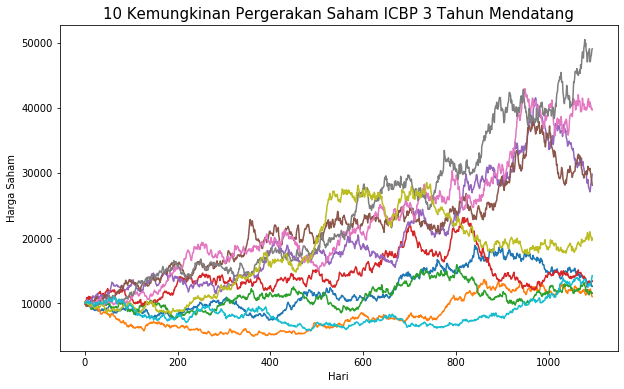

In [24]:
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.title("10 Kemungkinan Pergerakan Saham ICBP 3 Tahun Mendatang", fontsize = 15)
plt.ylabel("Harga Saham", fontsize = 10)
plt.xlabel("Hari", fontsize = 10)
plt.show()

In [18]:
norm.ppf(np.random.rand(t_interval,iteration))

array([[ 0.44779143,  0.57158589,  1.53650962, ...,  0.25027549,
         0.66797313, -0.60332056],
       [ 2.02442431, -1.29276521,  0.03413324, ..., -0.2039662 ,
        -0.81262025,  1.92266026],
       [ 1.25169456,  0.59010084, -0.15512414, ...,  0.50899207,
        -0.01112861,  0.61542844],
       ...,
       [-0.56899207,  0.54741129, -1.6741938 , ...,  0.25530406,
         1.06112653,  0.72298123],
       [ 0.25151672, -0.44461919, -1.19151114, ..., -1.64230149,
        -0.46742388, -0.18130299],
       [-0.74999699,  0.7403934 , -0.24220422, ..., -0.53078713,
         0.68793788, -2.25725355]])